In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
ri = pd.read_csv('police.csv')

In [259]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [260]:
ri.shape

(91741, 15)

In [261]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [262]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [263]:
ri.drop('county_name', axis=1, inplace=True)

In [264]:
ri.shape

(91741, 14)

In [265]:
ri[ri.violation=='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [266]:
ri[ri.driver_gender=='M'].violation.value_counts(normalize=True)
## normalize yuzde olarak gosterir degerleri

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [267]:
ri[ri.violation=='Speeding'].groupby('driver_gender').violation.value_counts()

driver_gender  violation
F              Speeding     15482
M              Speeding     32979
Name: violation, dtype: int64

In [268]:
## Groupbyli hali gormek icin unstack yapilir

ri.groupby('driver_gender').violation.value_counts().unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2487,3204,690,1013,635,15482
M,8533,13020,3627,2419,2317,32979


In [269]:
## Cok onemli bir gosterim .loc ile daha once groupby yaptigimiz bir datanin columndaki degerine erisebiliriz. Ornegin Speeding 
ri.groupby('driver_gender').violation.value_counts().loc[:,'Speeding']

driver_gender
F    15482
M    32979
Name: violation, dtype: int64

In [270]:
ri.groupby('driver_gender').search_conducted.value_counts().unstack()

search_conducted,False,True
driver_gender,,
F,23040,471
M,60170,2725


In [271]:
pd.crosstab(ri.driver_gender, ri.search_conducted)

search_conducted,False,True
driver_gender,,
F,23040,471
M,60170,2725


In [272]:
ri.search_conducted.value_counts(normalize=True)
## Burada boolean deger alan bir columndaki False ve True percentageni goruyoruz(normalize percentage yapar)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [273]:
ri.search_conducted.mean()
## Mean bize yuzde verir booleanlar icin --- cok onmeli bir tip
## yukaridaki yani seyi mean ile de yapabiliriz cunku sadece True olanlarin ortalamasi bize ayni yuzdeyi verir
## ki Falselar 0 oldugu icin

0.03483720473942948

In [274]:
## GENDER SERACHED AFTER BEING STOPPED

ri.groupby('driver_gender').search_conducted.mean()
## Bu bize her bir cinsyiyet icin aranma ortalamasini verir yani durdurulan arabalar icin erkelerin yuzde 4 yu bayanlarin yuzde 2 
## si araniyormus

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [275]:
##Does gender affect who gets searched drung a stop?
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [276]:
## Why is serach_type missing so often?

ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [277]:
## Because every stop does not necessairly require a kind of search type/ her durdurulan araba aranmaiyor

ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [278]:
ri[ri.search_conducted==False].search_type.value_counts()
## Bir araba aranmadiginda search_conducted False olduguna gore, aranma yapilmasi False iken aranma tipi dogal olarak bos kume olur

Series([], Name: search_type, dtype: int64)

In [279]:
ri[ri.search_conducted==False].search_type.value_counts(dropna=False)
## Bu bize NaN leri gosterir search type icindeki

NaN    88545
Name: search_type, dtype: int64

In [280]:
## During a search, how often is the driver frisked? ## ustunun aranmasi

ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [281]:
ri.search_type.str.contains('Frisk').sum()

274

In [282]:
ri['Frisk'] = ri.search_type.str.contains('Frisk')

In [283]:
ri.Frisk.value_counts(dropna=False)
## dropna False, degerleri de gosterir, PANDAS NaN/Missing value lari default olarak ignore eder

NaN      88545
False     2922
True       274
Name: Frisk, dtype: int64

In [284]:
ri.Frisk.mean()
## Yuzde 8,5 unda ust aramasi yapiliyormus

0.085732165206508129

In [285]:
274 / (274+2922)
## mean in verdigi ortalamayi kontrol ettik

0.08573216520650813

In [286]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [287]:
## Which year had the least number of stops?

In [288]:
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [289]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
## burada tarihi ve stop time i brilestiriyoruz ayni seride, su anda ikisi de string datetime a cevitrmedik daha

combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [290]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [291]:
ri.stop_datetime.dt.year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: stop_datetime, dtype: int64

In [292]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [293]:
## How does drug activity change by time of the day?

In [294]:
ri.groupby(ri.stop_datetime.dt.hour)['drugs_related_stop'].mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

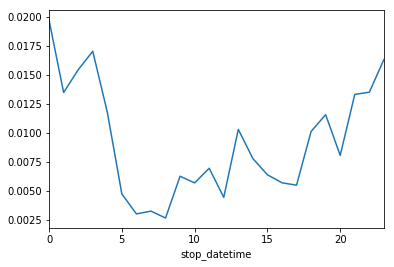

In [295]:
ri.groupby(ri.stop_datetime.dt.hour)['drugs_related_stop'].mean().plot()

In [296]:
## Do most stops occur at night?

In [297]:
ri.stop_datetime.dt.hour.value_counts().sort_index()
## Burada sort_index dememizin nedeni saatleri index olarak gostriyor ve saatleri siralamak istiyoruz degeleri degil

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

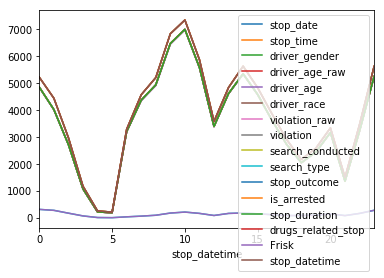

In [298]:
ri.groupby(ri.stop_datetime.dt.hour).count().plot()
## Eger bir columnda missing value yoksa count().plot() ile plotlayabiliriz. 

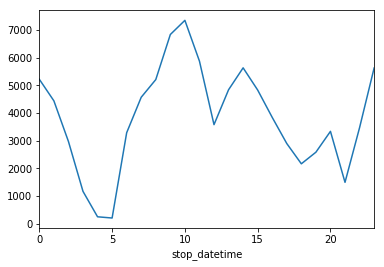

In [299]:
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

In [300]:
## Find the bad data in the stop_duration column and fix it

ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [301]:
## burada 1 ve 2 bad data, cunku 1 saat mi 1 dk mi belli degil. duzeltmek icin

# eger 1 ve 2 yi NaN olarak degistimek istersek np.nan ile degistirilir sakin 'NaN' yapma yoksa string olarak atar NaN i.

ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = np.nan

In [302]:
ri.stop_duration.value_counts()
## sadece value_counts yaparsan NaN lar gorulmez

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
Name: stop_duration, dtype: int64

In [303]:
ri.stop_duration.value_counts(dropna=False)
## dropna=False iel NaN degerler de gorulur

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64